In [38]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Creates a matrix based on the collected data

non = pd.read_csv("walk.csv", header = None)
wheel = pd.read_csv("chair.csv", header = None)
wheel.loc[0,0] = float('NaN')
data = [non, wheel]
mat1 = [[0 for _ in range(21)] for _ in range(21)]
mat2 = [[0 for _ in range(21)] for _ in range(21)]

for i in range(0, 21):
  for j in range(0, 21):
    if i == j:
      mat1[i][j] = ''
    elif np.isnan(data[0].iloc[i, j]):
      mat1[i][j] = ''
    else:
      mat1[i][j] = float(data[0].iloc[i, j])
#print(mat1)
for i in range(0, 21):
  for j in range(0, 21):
    if i == j:
      mat2[i][j] = ''
    elif pd.isnull(data[1].iloc[i, j]):
      mat2[i][j] = ''
    else:
      mat2[i][j] = float(data[1].iloc[i, j])

data = [mat1, mat2]

# A few trials

#1 - 4
data[1][0][3] = 160
data[1][3][0] = 160

#8 - 9
data[1][7][8] = 270
data[1][8][7] = 240

#15-19
data[1][14][18] = 90
data[1][18][14] = 90

#8 - 9
#9 -8
#4-1 and 1-4 = 385
print(data)

[[['', 97.28, 205.66, 51.28, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], [85.34, '', '', '', 106.75, '', '', '', '', '', '', 169.41, '', '', '', '', '', '', '', '', ''], [216.58, '', '', 107.85, '', '', 69.19, 109.4, '', '', '', '', '', '', '', '', '', '', '', '', ''], [59.84, '', 92.34, '', 110.39, 105.37, '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['', 114.99, '', 110.39, '', '', '', '', '', 63.85, '', 106.19, '', '', '', '', '', '', '', '', ''], ['', '', '', 97.41, '', '', '', 93.97, 130.63, '', '', '', '', '', '', '', '', '', '', '', ''], ['', '', 69.19, '', '', '', '', 130.63, '', '', '', '', '', 92.56, '', '', '', '', '', '', ''], ['', '', 109.4, '', '', 93.97, 65.7, '', 101.49, '', '', '', 64.58, '', 113.4, '', '', '', '', '', ''], ['', '', '', '', '', 107.52, '', 72.93, '', 56.71, 56.71, '', 60.31, '', '', 126.62, '', '', '', '', ''], ['', '', '', '', 63.85, '', '', '', 56.71, '', 30.34, 43.33, '', '', '', '', '', '', '', '', ''], ['',

In [94]:
# Implements Dijkstra's algorithm to find the quickest time taken to go froma  certain starting node to an ending node within the UCLA Campus


import copy
import statistics
m1 = copy.deepcopy(data[0])
m2 = copy.deepcopy(data[1])
datas = [m1, m2]
for n in range(0, 2):
  for i in range(0, 21):
    for j in range(0, 21):
      if i == j:
        datas[n][i][j] = 0
      elif datas[n][i][j] == '':
        datas[n][i][j] = float('inf')
      else:
        datas[n][j][j] = float(datas[n][i][j])
def connected_node_times(start, end, num):
  if(start == end):
    return 0
  direct_time = datas[num][start][end]
  between_nodes = []
  length = 0
  for i in range(0, 21):
    vec = [i != start, i != end, math.isinf(datas[num][start][i]) == False, math.isinf(datas[num][i][end]) == False, i != j]
    if all(item == True for item in vec):
      between_nodes.append(i)
      length = length + 1
  indirect_times = [0 for _ in range(length)]
  for i in range(0, length):
    indirect_times[i] = datas[num][start][between_nodes[i]] + datas[num][between_nodes[i]][end]
  if math.isinf(datas[num][start][end]) == True:
    if len(indirect_times) > 0:
      return min(indirect_times)
    else:
      return 9999
  else:
    allthetimes = [0 for _ in range(length + 1)]
    allthetimes[0] = direct_time
    for k in range(0, length):
      allthetimes[k + 1] = indirect_times[k]
    if len(allthetimes) > 0:
      return min(allthetimes)
    else:
      return 9999
def get_Time(start, end, num):
  mat = datas[num]
  counter = 0
  change = True
  if start == 6 and num == 1:
    start, end = (end, start)
  while change:
    change = False
    counter = counter + 1
    for i in range(0, 21):
      for j in range(0, 21):
        if connected_node_times(i, j, num) != 9999 and connected_node_times(i, j, num) < datas[num][i][j]:
          datas[num][i][j] = connected_node_times(i, j, num)
          change = True
  return datas[num][start - 1][end - 1]

def get_mean_commute_time(n):
  sum = []
  for i in range(1, 22):
    for j in range(1, 22):
      if (math.isinf(get_Time(i, j, n)) == False) and (get_Time(i, j, n) != 0):
        sum.append(get_Time(i, j, n))
  return statistics.mean(sum)


In [95]:
# Tests the get_Time and connected_node_times functions

print(connected_node_times(0, 1, 0)) #2 to 1: Most efficient path is 2 to 1
print(connected_node_times(1, 1, 0)) #2 to 2:
print(connected_node_times(0, 4, 0)) #1 to 5: Most efficient path is 1 to 4 to 5
print(connected_node_times(0, 5, 0)) #1 to 6: Most efficient path is 1 to 4 to 6
print(connected_node_times(0, 11, 0)) #1 to 12: Most efficient path is 1 to 2 to 11
print(connected_node_times(0, 20, 0))

print(get_Time(5, 2, 0))
print(get_Time(8, 9, 0))
print(get_Time(8, 9, 1))
print(get_Time(6, 4, 1))
print(get_Time(4, 6, 1))

97.28
0
161.67000000000002
156.65
266.69
9999
114.99
101.49
270
643.01
643.01


In [97]:
# Creates a matrix filled with the quickest time it takes for each path.

import pandas as pd

finalmat = [[0 for _ in range(21)]for _ in range(21)]
final_mat = [[[0 for _ in range(21)]for _ in range(21)], [[0 for _ in range(21)]for _ in range(21)]]
for n in range(0, 2):
  for i in range(1, len(finalmat) + 1):
    for j in range(1, len(finalmat[i - 1]) + 1):
        final_mat[n][i - 1][j - 1] = get_Time(i, j, n)

205.305
366.87


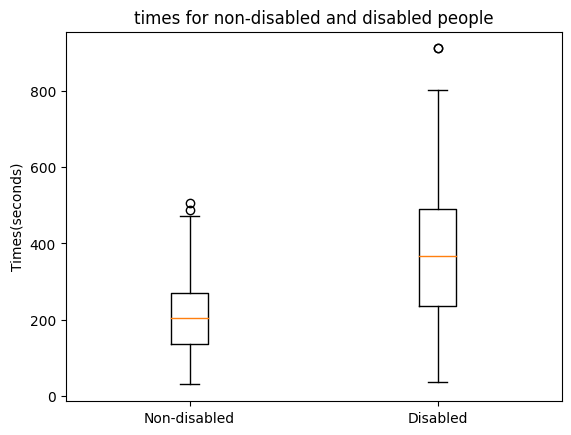

In [98]:
# Data Visualization
able_times = pd.DataFrame(final_mat[0])
disabled_times = pd.DataFrame(final_mat[0])
vec_able = []
vec_disable = []
for i in range(0, 21):
  for j in range(0, 21):
    if i != j:
      vec_able.append(final_mat[0][i][j])
      vec_disable.append(final_mat[1][i][j])
mat = [vec_able, vec_disable]
plt.boxplot(mat)
plt.title("times for non-disabled and disabled people")
plt.xticks([1, 2], ['Non-disabled', 'Disabled'])
plt.ylabel('Times(seconds)')

print(np.median(vec_able))
print(np.median(vec_disable))

[0.20302220394736836, 1.2793482801838185, 2.1201248049921997, 0.01051524710830698, 4.126141078838174, 1.065692401672854, 0.7935120900167585, 0.6129752329660205, 0.29451933309684275, 0.2891424998045806, 0.3029734898196408, 0.9791560913705581, 0.7903526869044111, 0.5535684852480633, 0.5159481343691874, 0.6572206061743453, 0.6492209244856022, 0.39139940143909335, 0.46043812693985875, 0.4612819381099509, 0.2670494492617763, 0.9020352900069881, 0.9625969843361146, 0.8775644028103045, 2.76519690896318, 0.8370954217675668, 0.8572475353050892, 1.1657208217852268, 0.9284876905041033, 0.7835672340001991, 0.6761702378844223, 1.5448856129615463, 0.6760512912390266, 0.8924628479928081, 0.7664499098635078, 0.8821707768420259, 0.5797943674564148, 0.7343753751590674, 0.6522966384398257, 0.5086710116180222, 0.9578985031904108, 0.6807563120353244, 0.5606861381548447, 0.16798020527859214, 1.3388405369523526, 0.6221997398467987, 0.11636197440584994, 0.8594053772108683, 0.43299701046337824, 0.5746263079222

Text(0, 0.5, 'Relative Frequency')

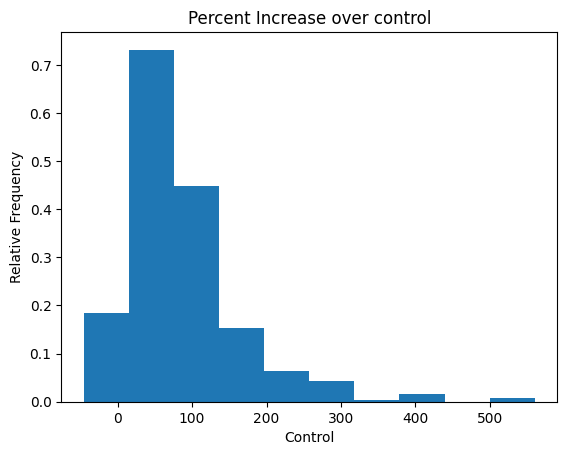

In [99]:
# Data Visualization

new_vec = []

for i in range(0, len(vec_able)):
  if math.isinf(vec_disable[i]) == False:
    new_vec.append((vec_disable[i] / vec_able[i]) - 1)

print(new_vec)

plt.hist(new_vec, density = True)
plt.title("Percent Increase over control")
plt.xticks([0, 1, 2, 3, 4, 5], [0, 100, 200, 300, 400, 500])
plt.xlabel("Control")
plt.ylabel("Relative Frequency")

In [100]:
# Testing

for i in range(0, 21):
  for j in range(0, 21):
    if i != j:
      if final_mat[1][i][j] / final_mat[0][i][j] >= 5 and math.isinf(final_mat[1][i][j]) == False:
        print("[", i, ", ", j, "]: ", "wheelchair = ", final_mat[1][i][j], " walking = ", final_mat[0][i][j])


[ 0 ,  5 ]:  wheelchair =  803.01  walking =  156.65
[ 3 ,  5 ]:  wheelchair =  643.01  walking =  105.37
[ 5 ,  0 ]:  wheelchair =  803.01  walking =  157.25
[ 5 ,  3 ]:  wheelchair =  643.01  walking =  97.41


In [77]:
# Customized Least Resistance Algorithm

def least_resistance(start, end, d = 0):

  # breaks if already at the end
  if start == end:
    return [0, [start]]
  # sets default values, giving all adjoining nodes to start and end
  completed = False
  boo = True
  spaths = []
  if start == 6 and d == 1:
    (start, end) = (end, start)
    boo = False
  for i in range(1,22):
    if data[d][start-1][i-1] != "":
      spaths.append([i])
  epaths = []
  for i in range(1,22):
    if data[d][i-1][end-1] != "":
      epaths.append([i])
  voltage = 0
  route = []
  # main loop, increases voltage and runs a series of checks
  while not completed:
    voltage += 1
    # for each set of paths, calculates residual voltage left over after subtracting resistance of each existing path
    for paths in spaths:
      residual = voltage
      for i in range(len(paths)):
        if i == 0:
          residual -= float(data[d][start-1][paths[0]-1])
        else:
          residual -= float(data[d][paths[i-1]-1][paths[i]-1])
      # checks if the residual is sufficient to complete another path
      for i in range(1, 22):
        if i != start and paths.count(i) == 0:
          if data[d][paths[len(paths)-1]-1][i-1] != "":
            if residual >= float(data[d][paths[len(paths)-1]-1][i-1]):
              # appends the path as long as it isn't a duplicate
              new_path = []
              for element in paths:
                new_path.append(element)
              new_path.append(i)
              duplicate = False
              for expaths in spaths:
                if expaths == new_path:
                  duplicate = True
              if not duplicate:
                spaths.append(new_path)
    # same implementation as above, but for the set of end paths
    for paths in epaths:
      residual = voltage
      for i in range(len(paths)):
        if i == 0:
          residual -= float(data[d][paths[0]-1][end-1])
        else:
          residual -= float(data[d][paths[i]-1][paths[i-1]-1])
      for i in range(1, 22):
        if i != end and paths.count(i) == 0:
          if data[d][i-1][paths[len(paths)-1]-1] != "":
            if residual >= float(data[d][i-1][paths[len(paths)-1]-1]):
              new_path = []
              for element in paths:
                new_path.append(element)
              new_path.append(i)
              duplicate = False
              for expaths in epaths:
                if expaths == new_path:
                  duplicate = True
                  break
              if not duplicate:
                epaths.append(new_path)
    # check condition for start and end paths meeting at a node
    checklist = [False] * 21
    for paths in spaths:
      checklist[paths[len(paths)-1]-1] = True
    for paths in epaths:
      if checklist[paths[len(paths)-1]-1]:
        # makes sure that the completion isn't from the default values with insufficient voltage
        if data[d][start-1][paths[len(paths)-1]-1] != "" and len(paths) == 1:
          if voltage * 2 <= float(data[d][start-1][paths[len(paths)-1]-1]) + float(data[d][paths[len(paths)-1]-1][end-1]):
            continue
        # creates the route by splicing together the start and reversed end path
        route.append(start)
        for paths_s in spaths:
          if paths_s[len(paths_s)-1] == paths[len(paths)-1]:
            for element in paths_s:
              route.append(element)
            break
        for i in range(len(paths)-2, -1, -1):
          route.append(paths[i])
        route.append(end)
        completed = True
        break
    # check condition for start and end paths meeting on a path
    for paths_s in spaths:
      # finds the residual of all possible start and end paths
      if not completed:
        sresidual = voltage
        for i in range(len(paths_s)):
          if i == 0:
            sresidual -= float(data[d][start-1][paths_s[0]-1])
          else:
            sresidual -= float(data[d][paths_s[i-1]-1][paths_s[i]-1])
        for paths_e in epaths:
          eresidual = voltage
          for j in range(len(paths_e)):
            if j == 0:
              eresidual -= float(data[d][paths_e[0]-1][end-1])
            else:
              eresidual -= float(data[d][paths_e[j]-1][paths_e[j-1]-1])
          # checks if the end nodes are adjoining and sum of residuals can span it
          if data[d][paths_s[len(paths_s)-1]-1][paths_e[len(paths_e)-1]-1] != "":
            if sresidual + eresidual > float(data[d][paths_s[len(paths_s)-1]-1][paths_e[len(paths_e)-1]-1]):
              # creates the route by splicing together the start and reversed end path
              route.append(start)
              for element in paths_s:
                route.append(element)
              for k in range(len(paths_e)-1, -1, -1):
                route.append(paths_e[k])
              route.append(end)
              completed = True
              break
  # calculates time using the paths from the route data
  time = 0
  for i in range(1, len(route)):
    time += float(data[d][route[i-1]-1][route[i]-1])
  # if start and end is connected, check this value against time
  if data[d][start-1][end-1] != "":
    if float(data[d][start-1][end-1]) < time:
      time = float(data[d][start-1][end-1])
      route = [start, end]
  if boo == False:
    route = route[::-1]
  return [time, route]


In [101]:
# Tests

print(least_resistance(1, 2, 0)[0])
print(get_Time(1, 6, 1))
print(data[0][8][8])
print(least_resistance(3, 9, 1)[0])
print(get_Time(3, 9, 1))

97.28
803.01

392.13
392.13


In [92]:
# Computes the accuracy of the model. Dijkstra's Algorithm vs Least Resistance Algorithm

def identicaltimes():
  count = 0
  for p in range(0, 2):
    for i in range(1, 22):
      for j in range(1, 22):
        if abs(get_Time(i, j, p) - least_resistance(i, j, p)[0]) > 1.0:
          count = count + 1
  return count
print("Accuracy = ", 1 - (identicaltimes()/(21 * 21 * 2)))




Accuracy =  0.9648526077097506


In [ ]:
# Table of Data in LaTex for our Report
\documentclass{article}
\usepackage{tabularx}
\begin{document}
\begin{tabularx}{1\textwidth} {
  | >{\raggedleft\arraybackslash}X
  | >{\centering\arraybackslash}X
  | >{\raggedleft\arraybackslash}X
  | >{\centering\arraybackslash }X|}

  \hline
 TABLE & LOCATION DESCRIPTION & COORDINATES & ELEVATION (ft) \\
 \hline
 1 & Northern Lights & 34.074291, -118.442521 & 448.8 \\
 \hline
 2  & Bunche Hall  & 34.074257, -118.440335 & 459.3  \\
\hline
3  & Anderson School  & 34.073473, -118.443653 & 416.2 \\
\hline
4  & Parking Str  & 34.073471, -118.442710 & 432.2  \\
\hline
5  & Rolfe Hall  & 34.073507, -118.441700 & 449.1  \\
\hline
6  & Bottom Jan Steps  & 34.072626, -118.442746 & 435.7  \\
\hline
7  & Wilson Plaza  & 34.072209, -118.444543 & 400.2  \\
\hline
8  & Cout of Philantropy  & 34.072222, -118.443639 & 409.4  \\
\hline
9  & Top Jan Steps  & 34.072186, -118.442686 & 443.7 \\
\hline
10  & Royce-Hainz  & 34.072428, -118.441654 & 449.4  \\
\hline
11  & Powell-Kaplan  & 34.072016, -118.441640 & 449.1  \\
\hline
12  & Large Flag  & 34.072212, -118.440937 & 444.2  \\
\hline
13  & Election Walk  & 34.071603, -118.443200 & 421  \\
\hline
14  & UCLA Bruin Statue  & 34.070987, -118.444762 & 393.7  \\
\hline
15  & Bottom Kerckhoff Steps  & 34.070967, -118.443631 & 403.2  \\
\hline
16  & Moore's Hall  & 34.070974, -118.442612 & 442  \\
\hline
17  & Physics Building  & 34.070984, -118.441646 & 444.7  \\
\hline
18  & Computer Science Department  & 34.069817, -118.444542 & 397  \\
\hline
19  & Math-Sciences & 34.069825, -118.442942 & 434.2  \\
\hline
20  & Franz Hall  & 34.069877, -118.442096 & 437.4  \\
\hline
21  & Large Water Fountain  & 34.069979, -118.440808 & 426  \\
\hline


\end{tabularx}
\end{document}